<a href="https://colab.research.google.com/github/Daniel-Sottovia/Trabalho_Vibes/blob/main/trabalho_vibes05_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Vibes

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

Definição da Classe Vibes, é possível a entrada de três parâmetros:

*   **n** que é o número de somatórios de a_n e b_n que faremos para cada tempo;
*   **t** que é o período que analisaremos a Resposta do Sistema;
*   **passo** que é o tamanho que tempo aumenta após cada interação;



Caso não informado nenhum parâmetros, **n = 100** e **t = 2** e **passo = 0.05** .


In [ ]:
class Vibes():
    '''
    Um automóvel trafega sobre um solo irregular ilustrado na Figura 1.
    Pretendemos determinar a resposta vertical do automóvel durante
    a sua passagem sobre o solo.
    Para tanto, podemos representar o automóvel como um
    sistema de 1GDL sob excitação na base.
    '''
    def __init__(self, n = 100, t = 2, passo = 0.05):
        self.__passo = passo
        self.__periodo = t
        self.__n = n
        '''
        Propriedades m = 1000 kg, k = 196 kN/m e qsi = 0.1
        '''
        self.__massa = 1000
        self.__constante_k = 196
        self.__qsi = 0.1
        '''
        Velocidade dos três casos, 2 km/h, 10 km/h e 72 km/h.
        '''
        self.__velocidade1 = 2
        self.__velocidade2 = 10
        self.__velocidade3 = 72
        self.transformar_velocidade()
        '''
        Propriedades Y = 0.1 m e n = 0.2 m e lambda = 0.5 m
        '''
        self.__amplitudeY = 0.1
        self.__comprimento_degrau = 0.2
        self.__lambda = 0.5
        '''
        Obter os ômegas de cada velocidade
        '''
        self.omega()
        '''
        Onde irei colocar os dados.
        '''
        self.__tempo = []
        self.__lista1 = []
        self.__lista2 = []
        self.__lista3 = []
        '''
        Preencher o banco de dados da posição de cada caso
        '''
        self.deslocamento_carroceria_tempo()

    def omega(self):
        tau1 = self.__lambda / self.__velocidade1
        tau2 = self.__lambda / self.__velocidade2
        tau3 = self.__lambda / self.__velocidade3
        self.__omega1 = 2 * math.pi / tau1
        self.__omega2 = 2 * math.pi / tau2
        self.__omega3 = 2 * math.pi / tau3

    def transformar_velocidade(self):
        '''
        Transformar km/h em m/s
        '''
        self.__velocidade1 = round((self.__velocidade1 / 3.6), 2)
        self.__velocidade2 = round((self.__velocidade2 / 3.6), 2)
        self.__velocidade3 = round((self.__velocidade3 / 3.6), 2)

    def a_0(self):
        a_0 = 2 * (self.__amplitudeY*self.__lambda) / self.__comprimento_degrau
        return a_0

    def a_n(self, n: int):
        a_n = (self.__amplitudeY/(n * math.pi))*math.sin(n * 2 * math.pi * self.__comprimento_degrau / self.__lambda)
        return a_n

    def b_n(self, n: int):
        b_n = - (self.__amplitudeY/(math.pi * n)) * (math.cos((n * 2 * math.pi * self.__comprimento_degrau)/ self.__lambda) - 1)
        return b_n

    def deslocamento_carroceria_tempo(self):
        a_0 = self.a_0()
        t = 0
        while t <= self.__periodo:
            n = 1
            valor1, valor2, valor3 = 0, 0, 0
            while n <= self.__n:
                a_n = self.a_n(n=n)
                b_n = self.b_n(n=n)
                valor1 += a_n * math.cos(n * self.__omega1 * t) + b_n * math.sin(n * self.__omega1 * t)
                valor2 += a_n * math.cos(n * self.__omega2 * t) + b_n * math.sin(n * self.__omega2 * t)
                valor3 += a_n * math.cos(n * self.__omega3 * t) + b_n * math.sin(n * self.__omega3 * t)
                n += 1
            posicao1 = a_0 + valor1
            posicao2 = a_0 + valor2
            posicao3 = a_0 + valor3
            self.__tempo.append(t)
            self.__lista1.append(posicao1)
            self.__lista2.append(posicao2)
            self.__lista3.append(posicao3)
            t += self.__passo

    def grafico_v1(self):
        plt.figure(figsize=(10,6))
        plt.plot(self.__tempo, self.__lista1, '-b')
        plt.title(" 2 km/h ")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Posição [m]")
        plt.grid(True)
        plt.show()

    def grafico_v2(self):
        plt.figure(figsize=(10,6))
        plt.plot(self.__tempo, self.__lista2, '-r')
        plt.title(" 10 km/h ")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Posição [m]")
        plt.grid(True)
        plt.show()

    def grafico_v3(self):
        plt.figure(figsize=(10,6))
        plt.plot(self.__tempo, self.__lista3, '-c')
        plt.title(" 72 km/h ")
        plt.xlabel("Tempo [s]")
        plt.ylabel("Posição [m]")
        plt.grid(True)
        plt.show()

    def todos_graficos(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.__tempo, self.__lista1, label='linear')  # Plot some data on the (implicit) axes.
        plt.plot(self.__tempo, self.__lista2, label='quadratic')  # etc.
        plt.plot(self.__tempo, self.__lista3, label='cubic')
        plt.xlabel('Tempo [s]')
        plt.ylabel('Posição [m]')
        plt.title("Resposta do Sistema")
        plt.grid(True)
        plt.show()

    @property
    def tempo(self):
      return self.__tempo

    @property
    def lista1(self):
        return self.__lista1

    @property
    def lista2(self):
        return self.__lista2

    @property
    def lista3(self):
        return self.__lista3

Iniaciaremos a Classe Vibes():

In [ ]:
trabalho = Vibes(n=100, t = 0.4, passo = 0.0001)

Para gerar o gráfico no caso da velocidade igual a **2 km/h** ;

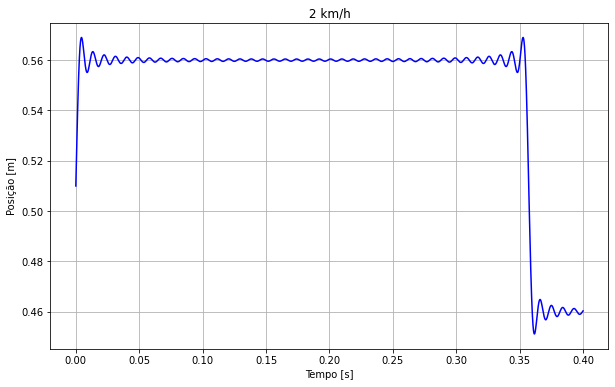

In [ ]:
trabalho.grafico_v1()

Para gerar o gráfico no caso da velocidade igual a **10 km/h** ;

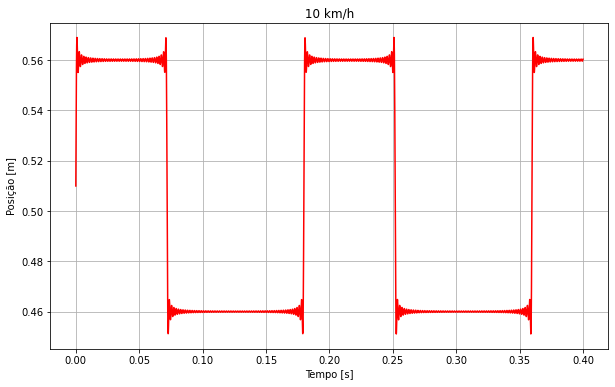

In [ ]:
trabalho.grafico_v2()

Para gerar o gráfico no caso da velocidade igual a **10 km/h** ;

*   Analisar os dados gerados, e entender se faz sentido;

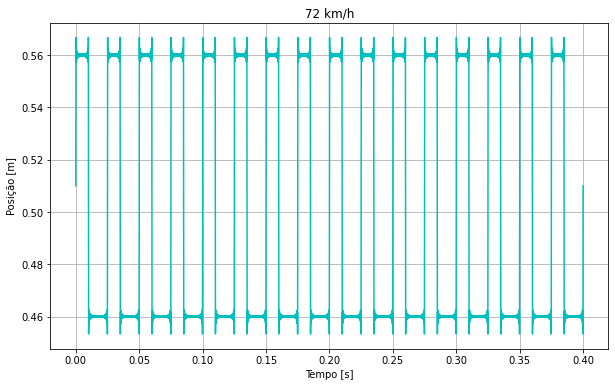

In [ ]:
trabalho.grafico_v3()

Para gerar o gráfico da **Resposta do Sistema**, que é a união de todos os casos;

*   Necessário realizar melhor configuração do gráfico;



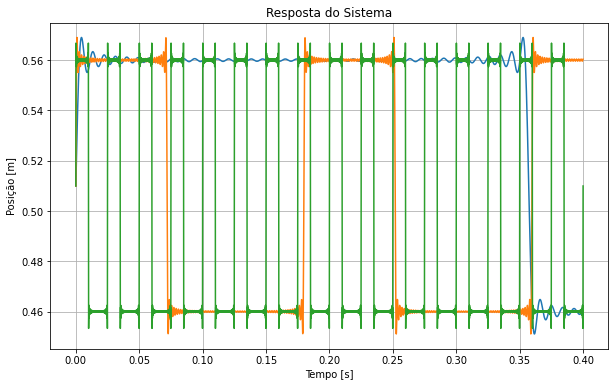

In [ ]:
trabalho.todos_graficos()